In [1]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
output_path = r"C:\Users\moham\Desktop\SwarmChat_github\SwarmChat\Dataset generator\combined_datasets.jsonl"

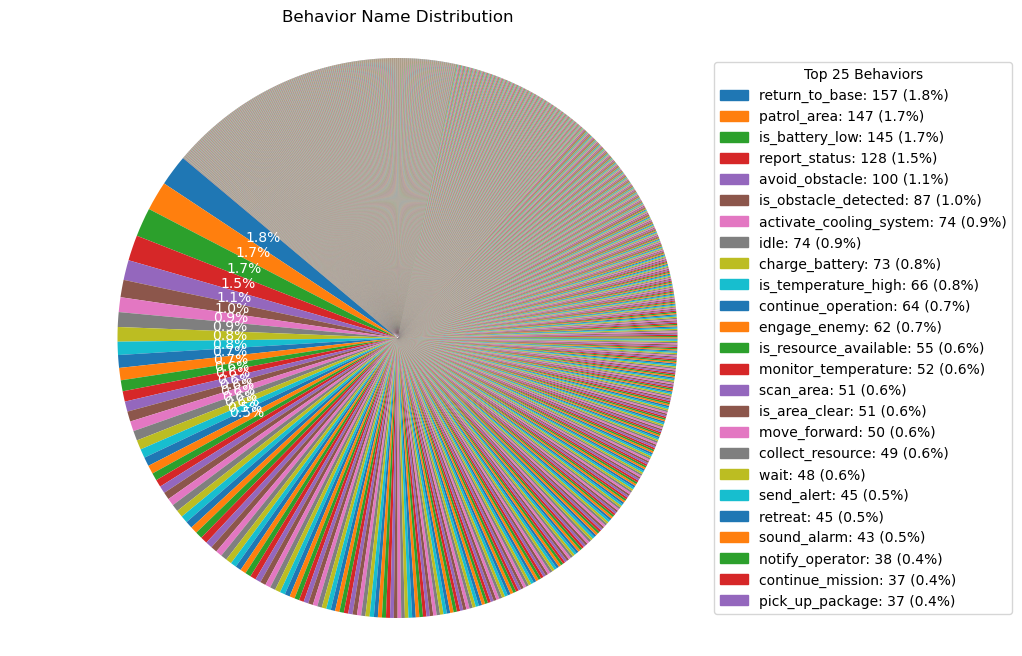

In [3]:
# Read the JSONL file into a DataFrame
df = pd.read_json(output_path, lines=True)

# Define a regex pattern to extract the word immediately preceding "Action Node" or "Condition node"
pattern = re.compile(r"(\w+)\s*:\s*(?:Action Node|Condition node)", flags=re.IGNORECASE)

# Extract behavior names from the INSTRUCTIONS field
all_behaviors_series = df['INSTRUCTIONS'].apply(lambda x: pattern.findall(x))
all_behaviors = [behavior for sublist in all_behaviors_series for behavior in sublist]

# Count the occurrences of each behavior name
behavior_counts = Counter(all_behaviors)

# Sort behavior counts in descending order
sorted_counts = sorted(behavior_counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [item[0] for item in sorted_counts]
sorted_sizes = [item[1] for item in sorted_counts]

total_counts = sum(sorted_sizes)
# Define a threshold for labeling slices (e.g., 0.5% of the total)
threshold_percent = 0.005  
threshold_value = threshold_percent * total_counts

# Plot the full pie chart (using the sorted order)
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sorted_sizes,
    autopct=lambda p: f'{p:.1f}%' if (p/100 * total_counts) >= threshold_value else '',
    startangle=140,
    textprops=dict(color="w")
)

# Get top 25 behaviors from the sorted list
top25 = sorted_counts[:25]
top20_labels = [item[0] for item in top25]

# Create legend handles for these top 25 using the wedge colors
legend_handles = []
for label in top20_labels:
    idx = sorted_labels.index(label)
    count = sorted_sizes[idx]
    percent = (count / total_counts) * 100
    # Get the corresponding wedge color
    color = wedges[idx].get_facecolor()
    legend_handles.append(mpatches.Patch(color=color, label=f"{label}: {count} ({percent:.1f}%)"))

plt.legend(handles=legend_handles, title="Top 25 Behaviors", loc="center left", bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.axis('equal')
plt.title("Behavior Name Distribution")
# plt.savefig("Behavior_Distribution.png")
plt.show()
